다음 순서로 과제를 진행하세요
1. http://rtdown.molit.go.kr/에 가서 본인이 거주하고 있는 특정 지역을 선정하고  최근 1년 날짜 (2021년 10월 31일 -2022년 10월 31일) 의 데이터를 받으세요.

  -> 실거래가 구분은 아파트 (매매) 로 고정합니다. 아래 그림과 같은 예로 1,2,3 부분에 본인이 거주하는 특정 지역을 선정하고 나머지 부분은 그림과 같은 상태에서 다운로드 버튼을 누르세요.
    

2. 다운 받은 엑셀 데이터를 "전용면적(㎡)","거래금액(만원)","층의 정보(예: 9층)","건축년도" 로 구글 코랩에 데이터 전처리를 통해서 4개의 컬럼으로 되어 있는 데이터프래임으로 저장하세요. (강의록과 강의콘텐츠 소스코드 참조)

3. 본인이 살고 있는 특정 지역에 최근 3개월 날짜 (2022년 8월 -2022년 10월) 의 데이터를 가져와 집 값 변화를 선형 그래프로 표현하세요.

4. 부동산 증감률 (값old-값new /값new* 100) 식을 이용해서 최근 3개월간 거주 지역의 변화를 그래프로 그리세요.

5. 변환된 데이터프레임을 가지고 주차 강의에 올려진 'House.ipynb' 보스턴 집값 예측 예제를 참고로 다음을 실행하세요

    5.1 상관 분석을 통해서 어떤 변수가 집값에 영향을 미치는지 그래프로 보이고 결과를 분석하세요

    5.2 회귀 직선을 그려보세요.

    5.3 데이터를 훈련과 학습 데이터로 나누고 학습을 통한 결과를 통화 선형 회귀를 통해서 집값을 예측하세요.

    5.4 MSE , RMSE, R^2 score 를 통해서 선형 회귀 모델의 성능을 평가하세요

1. http://rtdown.molit.go.kr/에 가서 본인이 거주하고 있는 특정 지역을 선정하고  최근 1년 날짜 (2021년 10월 31일 -2022년 10월 31일) 의 데이터를 받으세요.

  -> 실거래가 구분은 아파트 (매매) 로 고정합니다. 아래 그림과 같은 예로 1,2,3 부분에 본인이 거주하는 특정 지역을 선정하고 나머지 부분은 그림과 같은 상태에서 다운로드 버튼을 누르세요.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# 한글로 그래프 제목 입력해도 글씨 깨지지 않게 함

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (17.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # MSE, r2
from sklearn.metrics import explained_variance_score

plt.rc('font', family='NanumBarunGothic') 

df = pd.read_excel("/content/drive/MyDrive/김태우/대학교/2학년 2학기/데이터마이닝/Assignment/Data/아파트(매매)_실거래가_20221104160600.xlsx", skiprows = 16)
df

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,제주특별자치도 제주시 이도이동,1053-1,1053,1,고덕하이츠빌라,88.98,202202,23,"25,000",3,1994,고산동산5길 21-1,NaN,중개거래,제주 제주시
1,제주특별자치도 제주시 이도이동,1776-20,1776,20,광양씨티빌,83.85,202204,23,"23,700",5,2004,광양8길 16,NaN,중개거래,제주 제주시
2,제주특별자치도 제주시 이도이동,1166-1,1166,1,길용파크빌라트,92.73,202204,16,"31,900",4,2003,동광로 56,NaN,중개거래,제주 제주시
3,제주특별자치도 제주시 이도이동,1166-1,1166,1,길용파크빌라트,92.46,202204,19,"25,500",6,2003,동광로 56,20220517.0,중개거래,제주 제주시
4,제주특별자치도 제주시 이도이동,1166-1,1166,1,길용파크빌라트,92.46,202204,19,"25,500",6,2003,동광로 56,NaN,중개거래,"제주 서귀포시, 제주 제주시"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,제주특별자치도 제주시 이도이동,1026-11,1026,11,하늘그린,84.97,202205,11,"28,500",3,2005,구남로7길 33,NaN,중개거래,제주 제주시
81,제주특별자치도 제주시 이도이동,1026-11,1026,11,하늘그린,84.97,202205,11,"28,500",3,2005,구남로7길 33,20220525.0,중개거래,제주 제주시
82,제주특별자치도 제주시 이도이동,314-2,314,2,현원아트빌,77.37,202112,4,"22,500",6,2003,동광로 80,NaN,중개거래,제주 제주시
83,제주특별자치도 제주시 이도이동,1011-1,1011,1,화이트스톤빌,39.75,202209,15,"11,000",5,2014,신성로14길 13,NaN,중개거래,제주 제주시


2. 다운 받은 엑셀 데이터를 "전용면적(㎡)","거래금액(만원)","층의 정보(예: 9층)","건축년도" 로 구글 코랩에 데이터 전처리를 통해서 4개의 컬럼으로 되어 있는 데이터프래임으로 저장하세요. (강의록과 강의콘텐츠 소스코드 참조)

In [3]:
df = pd.read_excel("/content/drive/MyDrive/김태우/대학교/2학년 2학기/데이터마이닝/Assignment/Data/아파트(매매)_실거래가_20221104160600.xlsx", skiprows = 16, thousands = ',') # skiprows = 3을 입력하면 1행부터 3행까지 제외하고 가져옴.
df = df[['전용면적(㎡)', '거래금액(만원)', '층', '건축년도']].drop_duplicates() # 중복된 행 제거
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 84
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   전용면적(㎡)   73 non-null     float64
 1   거래금액(만원)  73 non-null     int64  
 2   층         73 non-null     int64  
 3   건축년도      73 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.9 KB


/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,전용면적(㎡),거래금액(만원),층,건축년도
0,88.98,25000,3,1994
1,83.85,23700,5,2004
2,92.73,31900,4,2003
3,92.46,25500,6,2003
5,82.44,20000,6,1995
...,...,...,...,...
78,84.70,25500,7,2004
80,84.97,28500,3,2005
82,77.37,22500,6,2003
83,39.75,11000,5,2014


3. 본인이 살고 있는 특정 지역에 최근 3개월 날짜 (2022년 8월 -2022년 10월) 의 데이터를 가져와 집 값 변화를 선형 그래프로 표현하세요.

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


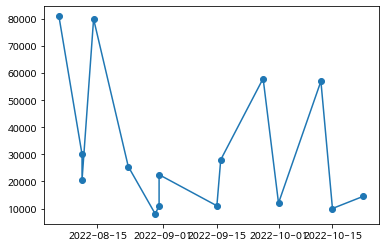

In [4]:
# 방법1: 단순히 날짜순으로 정렬하기
df = pd.read_excel("/content/drive/MyDrive/김태우/대학교/2학년 2학기/데이터마이닝/Assignment/Data/아파트(매매)_실거래가_20221104160600.xlsx", skiprows = 16, thousands = ',')

    # 전처리
df['계약일자'] = pd.to_datetime(df['계약년월'].astype(str) + df['계약일'].astype(str).str.zfill(2), format = '%Y%m%d') # 날짜 데이터 처리
df = df[['계약일자', '거래금액(만원)']].sort_values('계약일자') # 필요한 열만 추출하고 날짜 기준으로 정렬
df = df.drop_duplicates() # 중복된 행 제거
df_recent = df[(df['계약일자'] >= '2022-08-01') & (df['계약일자'] <= '2022-10-31')] # 최근 3개월 데이터 추출

    # 시각화
plt.plot(df_recent['계약일자'], df_recent['거래금액(만원)'], marker = 'o')
plt.show()

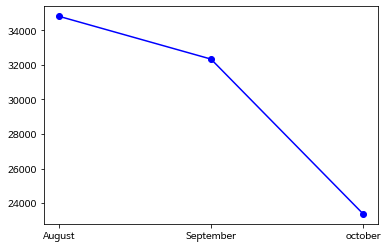

In [5]:
# 방법2: 월별로 평균을 계산하여 변화율을 나타내기
    # 월별 데이터 추출
df_august = df[(df['계약일자'] >= '2022-08-01') & (df['계약일자'] <= '2022-08-31')] # 8월 데이터
df_sept = df[(df['계약일자'] >= '2022-09-01') & (df['계약일자'] <= '2022-09-30')] # 9월 데이터
df_oct = df[(df['계약일자'] >= '2022-10-01') & (df['계약일자'] <= '2022-10-31')] # 10월 데이터

    # 월별 평균 집계
df_august_mean = df_august['거래금액(만원)'].mean(axis = 0)
df_sept_mean = df_sept['거래금액(만원)'].mean(axis = 0)
df_oct_mean = df_oct['거래금액(만원)'].mean(axis = 0)

    # 시각화
df_month_mean_list = [df_august_mean, df_sept_mean, df_oct_mean] # 월평균 집값 리스트
month_list = ['August', 'September', 'october']
plt.plot(month_list, df_month_mean_list, marker = 'o', c = 'b')
plt.show()


4. 부동산 증감률 (값old-값new /값new* 100) 식을 이용해서 최근 3개월간 거주 지역의 변화를 그래프로 그리세요.

 - 찾아보니 증감률은 (값new - 값old) / 값old * 100 으로 식이 나와있어서 이 식으로 계산하였습니다.

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


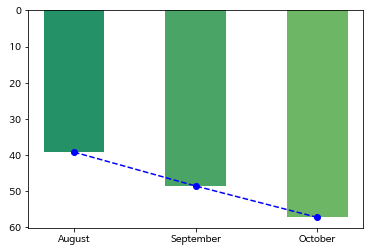

In [6]:
# 4. 부동산 증감률 (값old-값new /값new* 100) 식을 이용해서 최근 3개월간 거주 지역의 변화를 그래프로 그리세요.
    # 부동산 증감률을 계산하기 위해 1년전 데이터 불러오기
df_old = pd.read_excel("/content/drive/MyDrive/김태우/대학교/2학년 2학기/데이터마이닝/Assignment/Data/아파트(매매)_실거래가_20221111125903.xlsx", skiprows = 16, thousands = ",") 

    # 데이터 전처리하기
df_old['계약일자'] = pd.to_datetime(df_old['계약년월'].astype(str) + df_old['계약일'].astype(str).str.zfill(2), format = '%Y%m%d') # 날짜 데이터 처리
df_old = df_old.sort_values('계약일자') # 날짜 기준으로 오름차순 정렬
df_old = df_old[['계약일자', '거래금액(만원)']].drop_duplicates() # 필요있는 열만 추출하고 중복된 행 제거

    # 최근 3개월 데이터 뽑기
df_new = df[(df['계약일자'] >= '2022-08-01') & (df['계약일자'] <= '2022-10-31')] # 최근 데이터

    # 8월의 증감률 구하기: 데이터의 개수들이 너무 적어 각 월의 평균으로 계산을 하였다.
df_old_august = df_old[(df_old['계약일자'] >= '2021-08-01') & (df_old['계약일자'] <= '2021-08-31')] # 2021년 8월
df_new_august = df_new[(df_new['계약일자'] >= '2022-08-01') & (df_new['계약일자'] <= '2022-08-31')] # 2022년 8월
df_old_august_mean = df_old_august['거래금액(만원)'].mean(axis = 0)
df_new_august_mean = df_new_august['거래금액(만원)'].mean(axis = 0)
august_change = (df_new_august_mean - df_old_august_mean) / df_old_august_mean * 100

    # 9월의 증감률 구하기: 데이터의 개수들이 너무 적어 각 월의 평균으로 계산을 하였다.
df_old_sept = df_old[(df_old['계약일자'] >= '2021-09-01') & (df_old['계약일자'] <= '2021-09-30')] # 2021년 9월
df_new_sept = df_new[(df_new['계약일자'] >= '2022-09-01') & (df_new['계약일자'] <= '2022-09-30')] # 2022년 9월
df_old_sept_mean = df_old_sept['거래금액(만원)'].mean(axis = 0)
df_new_sept_mean = df_new_sept['거래금액(만원)'].mean(axis = 0)
sept_change = (df_new_sept_mean - df_old_sept_mean) / df_old_sept_mean * 100

    # 10월의 증감률 구하기: 데이터의 개수들이 너무 적어 각 월의 평균으로 계산을 하였다.
df_old_oct = df_old[(df_old['계약일자'] >= '2021-10-01') & (df_old['계약일자'] <= '2021-10-30')] # 2021년 10월
df_new_oct = df_new[(df_new['계약일자'] >= '2022-10-01') & (df_new['계약일자'] <= '2022-10-30')] # 2022년 10월
df_old_oct_mean = df_old_oct['거래금액(만원)'].mean(axis = 0)
df_new_oct_mean = df_new_oct['거래금액(만원)'].mean(axis = 0)
oct_change = (df_new_oct_mean - df_old_oct_mean) / df_old_oct_mean * 100

    # 시각화
rate_of_change = [august_change, sept_change, oct_change] # 증감률
month_list = ['August', 'September', 'October'] # 날짜
plt.bar(month_list, rate_of_change, color = sns.color_palette('summer'), width = 0.5)
plt.plot(month_list, rate_of_change, marker = 'o', color = 'b', linestyle = '--')
plt.show()

5. 변환된 데이터프레임을 가지고 주차 강의에 올려진 'House.ipynb' 보스턴 집값 예측 예제를 참고로 다음을 실행하세요

    5.1 상관 분석을 통해서 어떤 변수가 집값에 영향을 미치는지 그래프로 보이고 결과를 분석하세요

    5.2 회귀 직선을 그려보세요.

    5.3 데이터를 훈련과 학습 데이터로 나누고 학습을 통한 결과를 통화 선형 회귀를 통해서 집값을 예측하세요.

    5.4 MSE , RMSE, R^2 score 를 통해서 선형 회귀 모델의 성능을 평가하세요

In [7]:
df = pd.read_excel("/content/drive/MyDrive/김태우/대학교/2학년 2학기/데이터마이닝/Assignment/Data/아파트(매매)_실거래가_20221104160600.xlsx", skiprows = 16, thousands = ',') # skiprows = 3을 입력하면 1행부터 3행까지 제외하고 가져옴.
df = df[['전용면적(㎡)', '거래금액(만원)', '층', '건축년도']]
df

,전용면적(㎡),거래금액(만원),층,건축년도
0,88.98,25000,3,1994
1,83.85,23700,5,2004
2,92.73,31900,4,2003
3,92.46,25500,6,2003
4,92.46,25500,6,2003
...,...,...,...,...
80,84.97,28500,3,2005
81,84.97,28500,3,2005
82,77.37,22500,6,2003
83,39.75,11000,5,2014


  5.1 상관 분석을 통해서 어떤 변수가 집값에 영향을 미치는지 그래프로 보이고 결과를 분석하세요

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


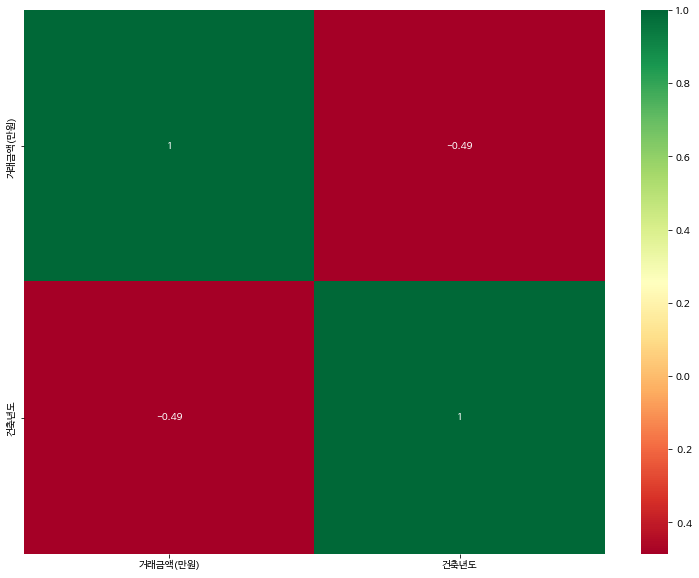

In [8]:
# 5.1 상관 분석을 통해서 어떤 변수가 집값에 영향을 미치는지 그래프로 보이고 결과를 분석하세요
    # 상관분석
corrmat = df.corr()
corr_columns = corrmat.index[abs(corrmat["거래금액(만원)"]) >= 0.4] # 상관계수 절댓값 0.4 이상만 포함
plt.figure(figsize = (13, 10))
heatmap = sns.heatmap(df[corr_columns].corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [9]:
    # 상관분석(위 그래프의 라벨이 보이지 않아 추가해줌.)
df[corr_columns].corr()

,거래금액(만원),건축년도
거래금액(만원),1.000000,-0.485441
건축년도,-0.485441,1.000000


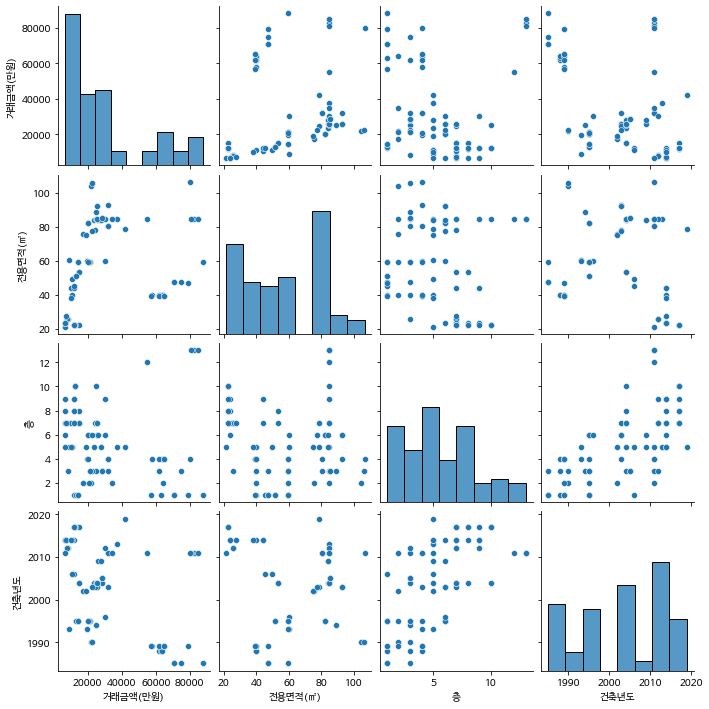

In [10]:
    # 그래프로 나타내기
sns.pairplot(df[["거래금액(만원)", "전용면적(㎡)", "층", "건축년도"]])
plt.show()

- 전용면적이 넓어질수록 집값이 올라가는 경향이 보인다.
- 층수와 집값은 관계가 없어보인다.
- 건축연도가 오래될수록 집 값이 올라가는 경향이 보인다(?)

  5.2 회귀 직선을 그려보세요.

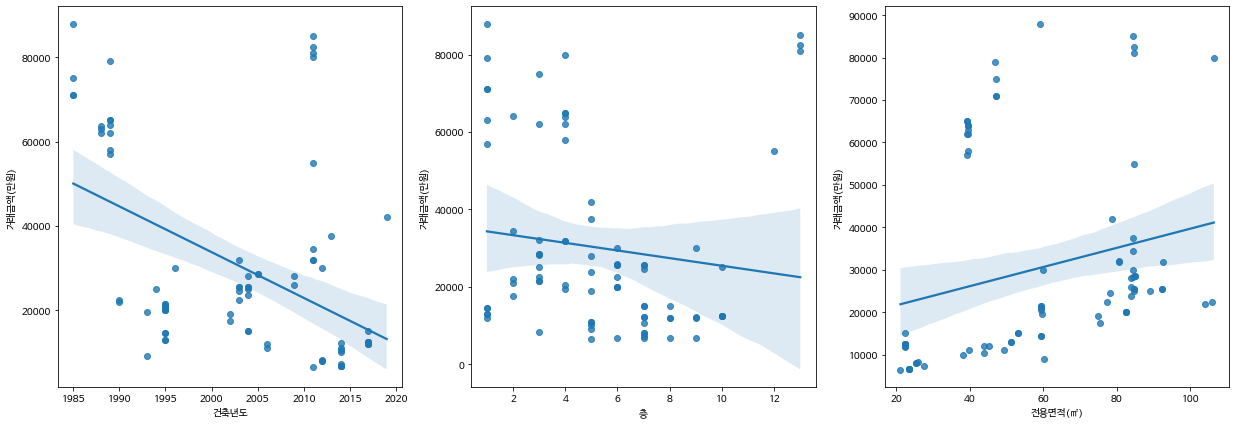

In [ ]:
# 5.2 회귀 직선을 그려보세요.
fig, ax = plt.subplots(figsize = (21, 7), ncols = 3)
lm_features = ['건축년도', '층', '전용면적(㎡)']

for i, feature in enumerate(lm_features):
    sns.regplot(x = feature, y = '거래금액(만원)', data = df, ax = ax[i])

5.3 데이터를 훈련과 학습 데이터로 나누고 학습을 통한 결과를 통화 선형 회귀를 통해서 집값을 예측하세요.

In [ ]:
# 5.3 데이터를 훈련과 학습 데이터로 나누고 학습을 통한 결과를 통화 선형 회귀를 통해서 집값을 예측하세요.
df['거래금액(만원)'] = np.log1p(df['거래금액(만원)']) # 정규성을 위해 로그 변환을 해줌.
y_target = df['거래금액(만원)'] # 종속변수
X_data = df.drop(['거래금액(만원)'], axis = 1, inplace = False) # 독립변수(피쳐)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 15)


    # 선형회귀
lr = LinearRegression()

    # fit 메서드 학습: 주어진 데이터로 알고리즘 학습
lr.fit(X_train, y_train)
print(X_train.shape, X_test.shape)

    # predict 메서드: 학습된 모델로 예측을 수행
y_preds = lr.predict(X_test)
y_preds

(59, 3) (26, 3)


array([10.4326098 ,  9.36994182,  9.29363386, 10.21427926, 10.41200024,
       10.11007142, 10.90132383, 10.29898817, 10.15037463,  9.8470759 ,
        9.33917768,  9.7153647 , 10.26989324, 10.18549786, 10.43164461,
       10.48536429, 10.5415654 ,  9.22345388,  9.76807037, 10.48040425,
        9.20124436,  9.39272305, 10.07474573, 10.5346639 ,  9.47802465,
       10.64314975])

5.4 MSE , RMSE, R^2 score 를 통해서 선형 회귀 모델의 성능을 평가하세요

In [ ]:
# 5.4 MSE , RMSE, R^2 score 를 통해서 선형 회귀 모델의 성능을 평가하세요
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE: {mse: .3f}, RMSE: {rmse: .3f}')
print(f'Variance score: {r2_score(y_test, y_preds): .3f}')
print(f'Explained_variance_score: {explained_variance_score(y_test, y_preds): .3f}')

MSE:  0.345, RMSE:  0.587
Variance score:  0.421
Explained_variance_score:  0.437


- 모델의 성능이 낮아서 회귀모델의 성능을 올리는 방법을 찾아서 해봤지만 성능이 높아지지 않았음. 피쳐를 상관관계가 낮은 순서대로 제거하며 성능을 높이는 방법인 단계적 회귀도 사용해보고 이상치를 제거하는 방법도 사용해봤으나 그마저도 성능이 높아지지 않음. 데이터 개수 부족 문제 같다.

(26,) (26,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


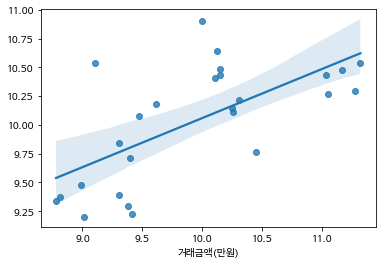

In [ ]:
print(y_test.shape, y_preds.shape)
sns.regplot(y_test, y_preds)

- 이번 과제를 하며 아웃라이어에 대해 조금 생각을 해봤습니다. 과연 이상치를 제거하는 것이 올바른 방법인지. 또는 이상치를 다른 값으로 대체해 성능을 높인다 하더라도 학점 4.5점이 집단에서 너무 떨어져 이상치로 판정이 되어 학점을 3.5로 수정하였다고 하여 그 모델이 믿을만 하지는 않은 것 같습니다. 또한 아예 제거해버리면 그 데이터는 이상치이지만 분명 의미가 있는 데이터입니다. 이상치를 어떻게 처리를 해야할지 모르겠습니다.